<a href="https://colab.research.google.com/github/brendanpshea/database_sql/blob/main/Database_10_DatabaseSecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guarding the Virtual Vault: A Deep Dive into Database Security
### Databases Through Pop Culture | Brendan Shea, PhD

In the digital age, databases have become the lifeblood of organizations, storing vast amounts of sensitive information. Just as the Toad City Hospital safeguards the health and well-being of its patients, it must also protect the confidentiality, integrity, and availability of its database systems. In this chapter, we embark on a comprehensive journey through the world of database security, exploring the fundamental concepts, common threats, and essential strategies to fortify these virtual vaults. From the CIA Triad to encryption, data masking to auditing, and firewalls to network segmentation, we'll uncover the critical measures that ensure the safety and resilience of databases in the face of ever-evolving cyber threats. Join us as we delve into the art and science of database security, arming you with the knowledge and tools to become a guardian of the digital realm.

Outcomes:

1.  Understand the CIA Triad and its importance in database security
2.  Identify common threats to databases and their impact
3.  Learn about encryption techniques and their role in protecting sensitive data
4.  Discover data masking and its application in safeguarding confidential information
5.  Recognize the significance of data destruction and secure deletion practices
6.  Appreciate the value of auditing and monitoring database activities
7.  Grasp the concepts of authentication, authorization, and access control
8.  Realize the importance of physical security measures for databases
9.  Comprehend the role of firewalls in database security
10. Explore network segmentation as a strategy to isolate and protect databases

Keywords: database security, CIA Triad, encryption, data masking, data destruction, auditing, authentication, authorization, access control, physical security, firewalls, network segmentation!


### Graphic: Drs. Mario and Peach

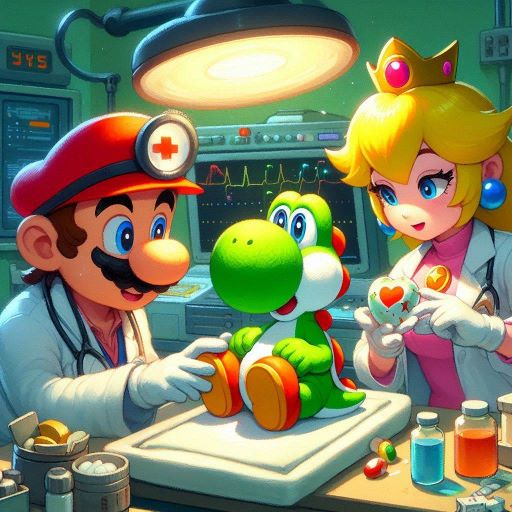

What is the CIA Triad and why is it important for database security?
--------------------------------------------------------------------

The **CIA Triad** is a fundamental concept in information security that stands for **Confidentiality**, **Integrity**, and **Availability**. It serves as a guiding framework for designing and implementing security measures to protect sensitive data stored in databases.

1.  **Confidentiality**: This principle ensures that data is accessible only to authorized individuals or systems. It prevents unauthorized disclosure of sensitive information. Confidentiality is maintained through various mechanisms such as encryption, access controls, and authentication.
2.  **Integrity**: Integrity ensures that data remains accurate, consistent, and trustworthy throughout its lifecycle. It prevents unauthorized modification or tampering of data. Integrity is maintained through techniques like data validation, checksums, and version control.
3.  **Availability**: Availability ensures that data is readily accessible to authorized users whenever needed. It involves maintaining the proper functioning of systems, networks, and resources. Availability is ensured through measures such as redundancy, backup systems, and disaster recovery planning.

The CIA Triad is crucial for database security because databases often store sensitive and critical information. A breach in any of these three aspects can lead to severe consequences, such as data leaks, financial losses, reputational damage, and legal implications.


## Case Study: Database at the Toad City Hospital

Let's consider a case study of the database at the Toad City Hospital, the Mushroom Kingdom's main medical center (which we encountered in earlier chapters). The hospital uses a PostgreSQL database to store sensitive patient information.

Here's an example of a sample table named `patients` with sensitive data:

In [1]:
# Install postgres
!apt install postgresql postgresql-contrib &>log
!service postgresql start
!sudo -u postgres psql -c "CREATE USER root WITH SUPERUSER"
# set connection
%load_ext sql
%sql postgresql+psycopg2://@/postgres

 * Starting PostgreSQL 14 database server
   ...done.
CREATE ROLE


In [7]:
%%sql
DROP TABLE IF EXISTS patients;

CREATE TABLE patients (
  patient_id SERIAL PRIMARY KEY,
  name VARCHAR(100) NOT NULL,
  date_of_birth DATE NOT NULL,
  social_security_number VARCHAR(200) NOT NULL,
  medical_history JSONB
);

 * postgresql+psycopg2://@/postgres
Done.
Done.


[]

The `patients` table contains sensitive information such as patient names, dates of birth, social security numbers, and medical histories. Ensuring the CIA Triad for this database is critical:

-   **Confidentiality**: Patient information should be kept confidential and accessible only to authorized healthcare professionals and staff members. Unauthorized access to this data could lead to privacy breaches and legal consequences.
-   **Integrity**: The accuracy and consistency of patient information are vital. Any unauthorized modifications or tampering with the data could result in incorrect diagnoses, treatment errors, and potential harm to patients.
-   **Availability**: The database must be available and accessible to authorized personnel whenever needed, especially in emergency situations. Downtime or inaccessibility of the database could hinder patient care and hospital operations.

To protect the sensitive data in the Toad City Hospital's database, various security measures aligned with the CIA Triad should be implemented. These measures will be explored in the subsequent sections of this chapter.

## What are the common threats to databases and how do they work?

Databases face various threats that can compromise the confidentiality, integrity, and availability of sensitive data. Understanding these threats is crucial for implementing effective security measures. Let's explore some of the common threats to databases:

### Who might want their data? (types of attackers)

Attackers seeking to gain unauthorized access to database data can be categorized into several types:

1.  **Cybercriminals** are motivated by financial gain. They may attempt to steal sensitive information for identity theft, financial fraud, or selling on the dark web.
2.  **Insider threats** include disgruntled employees, contractors, or privileged users with malicious intent can misuse their access to steal or manipulate data.
3.  **Competitors** such as rival organizations may seek to gain a competitive advantage by stealing trade secrets, customer data, or other confidential information.
4.  **Hacktivists** are driven by political or ideological motives. They may target databases to expose perceived wrongdoings or to make a statement.
5. **Advanced Persistent Threats** are often sponsored by hostile nation-states (such as the Koopa Kingdom), and reguarly deploy **zero-day exploits** (that is, entirely new ones) and have many resources (money, time, expertise) at their disposal. A major medical research center like Toad City hospital might well be a target for these actors.

### SQL Injection

**SQL Injection** is a code injection technique that exploits vulnerabilities in the database's input validation process. Attackers insert malicious SQL statements into application input fields, which are then executed by the database, allowing them to bypass security measures and gain unauthorized access to data.

Example: Consider a login form that accepts a username and password. If the application doesn't properly validate the input, an attacker could enter the following malicious input:

```
Username: admin' --
Password: this_is_now_irrelevant
```

The resulting SQL query would be:

```sql
SELECT * FROM users WHERE username = 'admin' -- AND password = 'this_is_now_irrelevant';
```

The `--` in the username input comments out the rest of the query, effectively bypassing the password check and granting access to the attacker.

To prevent SQL Injection, it's crucial to implement proper input validation and parameterized queries. (This was covered in previous chapters).

### DDoS (Distributed Denial of Service)

A **DDoS attack** aims to overwhelm a database server with a flood of traffic from multiple sources, rendering it unavailable to legitimate users. Attackers often use botnets (networks of compromised devices) to generate the massive traffic.

Example: Imagine the Toad City Hospital's database server is suddenly hit with a DDoS attack. The server is bombarded with a huge number of simultaneous requests, causing it to slow down or crash. As a result, healthcare professionals are unable to access critical patient information, disrupting patient care and hospital operations.

To mitigate DDoS attacks, organizations can implement traffic filtering, rate limiting, and use DDoS mitigation services. Firewalls play an important role in  this--more on these later.

### On-path attacks

**On-path attacks**, also known as Man-in-the-Middle (MitM) attacks, occur when an attacker intercepts the communication between the database client and server. The attacker can eavesdrop on the transmitted data and potentially modify it.

Example: Consider a scenario where a doctor at Toad City Hospital is accessing patient records from a remote location. If the communication channel is not properly secured, an attacker could intercept the data in transit, compromising the confidentiality and integrity of sensitive patient information.

To prevent on-path attacks, it's essential to use secure communication protocols like HTTPS and implement proper encryption for data in transit.

### Brute Force Attacks
**Brute force attacks** involve an attacker systematically trying all possible combinations of usernames and passwords until they find the correct credentials to gain unauthorized access to the database.

Example: Suppose an attacker targets the Toad City Hospital's database and obtains a list of employee usernames. Using automated tools, the attacker starts guessing common passwords or using a dictionary of frequently used passwords. If an employee has a weak or easily guessable password, the attacker may successfully gain access to the database.

To protect against brute force attacks, it's important to enforce strong password policies, implement account lockout mechanisms after multiple failed attempts, and consider using multi-factor authentication (MFA).

### Phishing
**Phishing** is a social engineering technique where attackers send fraudulent emails or messages posing as legitimate sources to trick individuals into revealing sensitive information, such as login credentials or personal data.

Example: An attacker sends an email to the employees of Toad City Hospital, pretending to be from the IT department. The email contains a link to a fake login page that resembles the hospital's legitimate database login page. If an employee falls for the phishing attempt and enters their credentials, the attacker can capture them and gain unauthorized access to the database.

To combat phishing, it's crucial to educate employees about identifying and reporting suspicious emails, implementing email filters, and using anti-phishing technologies.

### Malware
**Malware**, short for malicious software, refers to any software designed to harm computer systems or gain unauthorized access. In the context of databases, malware can be used to steal sensitive data, manipulate database content, or disrupt database operations.

Example: An attacker creates a malware program that infects the computers of Toad City Hospital employees. The malware secretly captures keystrokes, including database login credentials, and sends them back to the attacker. With these stolen credentials, the attacker can then access the database and exfiltrate sensitive patient information.

To protect against malware, it's important to keep systems and software up to date, use reputable anti-malware software, and implement strict access controls and monitoring mechanisms.

### Ransomware
**Ransomware** is a type of malware that encrypts the victim's data and demands a ransom payment in exchange for the decryption key. In the context of databases, ransomware attacks can render the entire database inaccessible, causing significant disruption to business operations.

Example: Imagine a ransomware attack on the Toad City Hospital's database. The attacker manages to infiltrate the hospital's network and deploy ransomware that encrypts all the data in the database. The hospital is then faced with a ransom demand to obtain the decryption key. Without access to critical patient information, the hospital's operations are severely hampered, and patient care is compromised.

To mitigate the risk of ransomware, it's essential to maintain regular backups of the database, implement strong access controls, and have an incident response plan in place.

Real-world example: In 2017, the WannaCry ransomware attack affected numerous organizations worldwide, including healthcare institutions. The UK's National Health Service (NHS) was significantly impacted, with multiple hospitals and clinics unable to access patient records and forced to cancel appointments and surgeries.

These are just a few examples of the threats that databases face. In the upcoming sections, we will explore encryption techniques, data masking, data destruction, auditing, and more to learn how to effectively secure databases against these threats.

## What is encryption and how does it protect databases?

Encryption is the process of converting plain text or data into a coded format that is unreadable without the proper decryption key. It is a fundamental technique used to protect the confidentiality and integrity of data stored in databases. Encryption ensures that even if unauthorized individuals gain access to the encrypted data, they cannot decipher its contents without the decryption key.

### Asymmetric vs Symmetric Encryption

There are two main types of encryption: asymmetric encryption and symmetric encryption. Let's explore how they work and their roles in database security.

#### Asymmetric Encryption (Public Key Cryptography)
Asymmetric encryption uses two separate keys: a public key for encryption and a private key for decryption. The public key can be freely distributed, while the private key must be kept secret. When data is encrypted with the public key, only the corresponding private key can decrypt it. In the context of database security, asymmetric encryption is often used for secure communication between clients and the database server.

For example, when a doctor at Toad City Hospital wants to access patient records from a remote location, they can use the hospital's public key to encrypt their login credentials. Only the database server, which holds the corresponding private key, can decrypt the credentials and authenticate the doctor's access. Asymmetric encryption is also used for digital signatures, which ensure the integrity and authenticity of data. When a doctor updates a patient's medical record, they can digitally sign the update using their private key. Anyone can then verify the signature using the doctor's public key, confirming that the update originated from the doctor and has not been tampered with.


#### Symmetric Encryption
Symmetric encryption uses a single secret key for both encryption and decryption. The same key must be securely shared between the sender and the receiver. When data is encrypted with the secret key, the same key is used to decrypt it. In database security, symmetric encryption is commonly used to encrypt data-at-rest, which refers to data stored on disk or in database tables.

For example, the Toad City Hospital can use symmetric encryption to encrypt sensitive patient information, such as social security numbers or medical histories, before storing it in the database. Only authorized personnel with access to the secret key can decrypt and view the data. Symmetric encryption is faster and more efficient compared to asymmetric encryption, making it suitable for encrypting large amounts of data. However, the challenge lies in securely sharing the secret key between the parties involved.

### Data-in-Transit vs Data-at-Rest

Encryption can be applied to data in two states: data-in-transit and data-at-rest.

**Data-in-transit** refers to data that is being transmitted over a network or communication channel. When sensitive data, such as patient information, is sent between the Toad City Hospital's client applications and the database server, it is crucial to encrypt the data to protect it from interception and eavesdropping. Secure communication protocols like HTTPS (HTTP Secure) and SSL/TLS (Secure Sockets Layer/Transport Layer Security) are used to establish an encrypted channel between the client and the server. These protocols use a combination of asymmetric and symmetric encryption to secure the data during transmission.


**Data-at-rest** refers to data that is stored on a device or storage medium, such as a database server's hard drive. Encrypting data-at-rest ensures that even if an attacker gains physical access to the storage device, they cannot read the data without the decryption key. For example, the Toad City Hospital can encrypt the entire database or specific sensitive columns, such as patient social security numbers or medical histories, using symmetric encryption. The encryption key is securely stored and managed by the database management system or a separate key management system.

### Client-side encryption, in-transit encryption, server-side encryption

When it comes to encrypting data in a database system, there are different stages at which encryption can be applied: client-side encryption, in-transit encryption, and server-side encryption.

1.  **Client-side encryption.** Data is encrypted on the client device before sending it to the database server. This ensures that the data remains encrypted throughout its journey from the client to the server. Client-side encryption provides an additional layer of security, as the database server never sees the unencrypted data.
2.  **In-transit encryption.** As mentioned earlier, data-in-transit encryption protects data as it travels over the network between the client and the server. Secure communication protocols like HTTPS and SSL/TLS are used to establish an encrypted channel, preventing eavesdropping and tampering during transmission.
3.  **Server-side encryption.** Data is encrypted on the database server before it is stored on disk. Server-side encryption protects data-at-rest and ensures that even if an attacker gains access to the database files, they cannot decipher the encrypted data without the decryption key. Server-side encryption can be implemented at the database level, file system level, or using specialized hardware.

### Example of a Postgres encrypted column

Let's consider an example of encrypting sensitive patient data in the Toad City Hospital's PostgreSQL database. We'll focus on encrypting the social security numbers (SSN) of patients using **symmetric encryption** for **at-rest** data.

Suppose we have a table named `patients` with a column `ssn` that needs to be encrypted. We can use the `pgcrypto` extension in PostgreSQL to encrypt the data using symmetric encryption.

In [15]:
%%sql
-- To use encyption, we need to enable an extension
CREATE EXTENSION IF NOT EXISTS pgcrypto;

DELETE FROM patients;

INSERT INTO patients (name, date_of_birth, social_security_number, medical_history)
VALUES
  ('Mario Mario', '1981-07-09', pgp_sym_encrypt('123-45-6789', 'my_secret_key'), '{"allergies": "none", "medications": "none"}'),
  ('Luigi Mario', '1983-07-14', pgp_sym_encrypt('987-65-4321', 'my_secret_key'), '{"allergies": "pollen", "medications": "none"}'),
  ('Princess Peach', '1985-10-18', pgp_sym_encrypt('456-78-9123', 'my_secret_key'), '{"allergies": "none", "medications": "none"}'),
  ('Yoshi', '1990-11-21', pgp_sym_encrypt('789-01-2345', 'my_secret_key'), '{"allergies": "none", "medications": "none"}'),
  ('Toad', '1985-07-14', pgp_sym_encrypt('567-89-0123', 'my_secret_key'), '{"allergies": "none", "medications": "none"}');

SELECT * FROM patients LIMIT 5;

 * postgresql+psycopg2://@/postgres
Done.
10 rows affected.
5 rows affected.
5 rows affected.


patient_id,name,date_of_birth,social_security_number,medical_history
21,Mario Mario,1981-07-09,\xc30d04070302655b0a9d9080245b74d23c01a74c62ae5a941034e2b9ed33d3044987ed8071529d348fc82547110847a0cf39a21304b6f42c8c47ab2af75f118f76c4d86ed4808d84fd8ad4d3c9,"{'allergies': 'none', 'medications': 'none'}"
22,Luigi Mario,1983-07-14,\xc30d040703022b47c44813fbe7f579d23c01bf2a43aabec0fe66981a6754bed47a5cf00123aef86102cadde11cd11dffa27094e357a4f21a803ed146939ce053a35895afa286a1417fd03acc1d,"{'allergies': 'pollen', 'medications': 'none'}"
23,Princess Peach,1985-10-18,\xc30d04070302ee153b518b3a63fc6cd23c01973829b86905207e19c6a872170faf8b8100ca04f8951567091b9586efa6caece8fa9897e0e4bc6b92f658530dc094ed384efcb161bf8897ad4d68,"{'allergies': 'none', 'medications': 'none'}"
24,Yoshi,1990-11-21,\xc30d04070302967c0a8461a6c84079d23c01c2b77bab1e53b4ad01579d0a63470605edeac64479386dc63c80796e204c701624caf6f4dc8b23399df2ca04420512f6dfb1a43c7043a191faf99e,"{'allergies': 'none', 'medications': 'none'}"
25,Toad,1985-07-14,\xc30d04070302c85121336cb28f4e71d23c01082c103e7b99fdf2a2ab2ece1c3afb37ba4658bba5295c81c47dd50b641bccfecb371456b0e2a51103877c0a3e8c0ad32ccbab7d1931e79e4a3f82,"{'allergies': 'none', 'medications': 'none'}"


As you can see, the ssn numbers have now been encrypted, so they cannot be without knowing the key.

To decrypt the SSN value, we can use the pgp_sym_decrypt function with the same secret key:

In [10]:
%%sql

SELECT
  patient_id,
  name,
  date_of_birth,
  pgp_sym_decrypt(social_security_number::bytea, 'my_secret_key') AS social_security_number,
  medical_history
FROM patients;


 * postgresql+psycopg2://@/postgres
10 rows affected.


patient_id,name,date_of_birth,social_security_number,medical_history
1,Mario Mario,1981-07-09,123-45-6789,"{'allergies': 'none', 'medications': 'none'}"
2,Luigi Mario,1983-07-14,987-65-4321,"{'allergies': 'pollen', 'medications': 'none'}"
3,Princess Peach,1985-10-18,456-78-9123,"{'allergies': 'none', 'medications': 'none'}"
4,Yoshi,1990-11-21,789-01-2345,"{'allergies': 'none', 'medications': 'none'}"
5,Toad,1985-07-14,567-89-0123,"{'allergies': 'none', 'medications': 'none'}"
6,Bowser,1980-09-13,321-65-9874,"{'allergies': 'none', 'medications': 'fire'}"
7,Daisy,1989-04-20,654-32-1987,"{'allergies': 'none', 'medications': 'none'}"
8,Wario,1992-03-19,234-56-7891,"{'allergies': 'none', 'medications': 'none'}"
9,Waluigi,1992-04-01,890-12-3456,"{'allergies': 'none', 'medications': 'none'}"
10,Rosalina,2007-11-12,345-67-8901,"{'allergies': 'none', 'medications': 'none'}"


By encrypting sensitive data like social security numbers, the Toad City Hospital adds an extra layer of protection to its database. Even if an attacker gains access to the database, they would need the secret key to decrypt and make sense of the encrypted data.
In the next section, we will explore data masking techniques and how they can be used to protect sensitive information in databases.

## Data Masking: Protecting Sensitive Information

Data masking is a technique used to protect sensitive information by replacing it with fictitious but realistic data. The purpose of data masking is to create a version of the data that can be used for non-production purposes, such as testing, development, or analytics, without exposing the real sensitive information.

Data masking is particularly important in scenarios where sensitive data needs to be shared with third parties or used in less secure environments. By masking the sensitive data, organizations can:

-   Comply with data privacy regulations, such as HIPAA or GDPR
-   Protect personally identifiable information (PII) and other sensitive data
-   Reduce the risk of data breaches and unauthorized access
-   Enable the use of realistic data for testing and development while maintaining data confidentiality

There are different types of data masking techniques, including:

-   **Static data masking**: Sensitive data is masked in a separate copy of the database, creating a masked version that can be used for non-production purposes.
-   **Dynamic data masking**: Masking is applied in real-time when the data is queried, providing different views of the data based on user roles and permissions.
-   **Deterministic masking**: The same input value always generates the same masked output, preserving data consistency across multiple databases or applications.
-   **Random masking**: Sensitive data is replaced with randomly generated values, making it impossible to reverse-engineer the original data.

### Implementing Data Masking in PostgreSQL

Let's walk through an example of implementing static data masking in PostgreSQL using the `patients` table. Let's begin by creating a copy of this table that will store our masked data.

In [18]:
%%sql
DROP TABLE IF EXISTS patients_masked;
CREATE TABLE patients_masked (
  patient_id SERIAL PRIMARY KEY,
  name VARCHAR(100) NOT NULL,
  date_of_birth DATE NOT NULL,
  social_security_number VARCHAR(200) NOT NULL,
  medical_history JSONB
);

 * postgresql+psycopg2://@/postgres
Done.
Done.


[]

Now, let's again insert our original patient (with unecrypted social security numbers).

In [19]:
%%sql
DELETE FROM patients;

INSERT INTO patients (name, date_of_birth, social_security_number, medical_history)
VALUES
  ('Mario Mario', '1981-07-09', '123-45-6789', '{"allergies": "none", "medications": "none"}'),
  ('Luigi Mario', '1983-07-14', '987-65-4321', '{"allergies": "pollen", "medications": "none"}'),
  ('Princess Peach', '1985-10-18', '456-78-9123', '{"allergies": "none", "medications": "none"}'),
  ('Yoshi', '1990-11-21','789-01-2345', '{"allergies": "none", "medications": "none"}'),
  ('Toad', '1985-07-14', '567-89-0123', '{"allergies": "none", "medications": "none"}');

SELECT * FROM patients LIMIT 5;

 * postgresql+psycopg2://@/postgres
5 rows affected.
5 rows affected.
5 rows affected.


patient_id,name,date_of_birth,social_security_number,medical_history
31,Mario Mario,1981-07-09,123-45-6789,"{'allergies': 'none', 'medications': 'none'}"
32,Luigi Mario,1983-07-14,987-65-4321,"{'allergies': 'pollen', 'medications': 'none'}"
33,Princess Peach,1985-10-18,456-78-9123,"{'allergies': 'none', 'medications': 'none'}"
34,Yoshi,1990-11-21,789-01-2345,"{'allergies': 'none', 'medications': 'none'}"
35,Toad,1985-07-14,567-89-0123,"{'allergies': 'none', 'medications': 'none'}"


Now, let's populate our new database with a masked version of our original data.

In [21]:
%%sql
DELETE FROM patients_masked;
INSERT INTO patients_masked (name, date_of_birth, social_security_number, medical_history)
SELECT
  'Patient ' || patient_id,
  '1900-01-01',
  'XXX-XX-' || substr(social_security_number, 8),
  '{"allergies": ["masked"], "conditions": ["masked"]}'
FROM patients;

 * postgresql+psycopg2://@/postgres
0 rows affected.
5 rows affected.
5 rows affected.


patient_id,name,date_of_birth,social_security_number,medical_history
1,Patient 31,1900-01-01,XXX-XX-6789,"{'allergies': ['masked'], 'conditions': ['masked']}"
2,Patient 32,1900-01-01,XXX-XX-4321,"{'allergies': ['masked'], 'conditions': ['masked']}"
3,Patient 33,1900-01-01,XXX-XX-9123,"{'allergies': ['masked'], 'conditions': ['masked']}"
4,Patient 34,1900-01-01,XXX-XX-2345,"{'allergies': ['masked'], 'conditions': ['masked']}"
5,Patient 35,1900-01-01,XXX-XX-0123,"{'allergies': ['masked'], 'conditions': ['masked']}"


In this example, we:

-   Replace the `name` with a generic "Patient" followed by the `patient_id`
-   Set the `date_of_birth` to a fixed value (`'1900-01-01'`)
-   Mask all but the last four digits of the `social_security_number`
-   Replace the `medical_history` JSON data with a masked version

The resulting `patients_masked` table will contain the masked data:

In [22]:
%%sql
SELECT * FROM patients_masked;

 * postgresql+psycopg2://@/postgres
5 rows affected.


patient_id,name,date_of_birth,social_security_number,medical_history
1,Patient 31,1900-01-01,XXX-XX-6789,"{'allergies': ['masked'], 'conditions': ['masked']}"
2,Patient 32,1900-01-01,XXX-XX-4321,"{'allergies': ['masked'], 'conditions': ['masked']}"
3,Patient 33,1900-01-01,XXX-XX-9123,"{'allergies': ['masked'], 'conditions': ['masked']}"
4,Patient 34,1900-01-01,XXX-XX-2345,"{'allergies': ['masked'], 'conditions': ['masked']}"
5,Patient 35,1900-01-01,XXX-XX-0123,"{'allergies': ['masked'], 'conditions': ['masked']}"


Data Discovery and Classification: Understanding Your Data
----------------------------------------------------------

In today's data-driven world, organizations collect and store vast amounts of data from various sources. This data can include sensitive information, such as personally identifiable information (PII), protected health information (PHI), financial data, and intellectual property. To effectively protect and manage this data, organizations need to understand what data they have, where it resides, and how sensitive it is. This is where data discovery and data classification come into play.

### Data Discovery

Data discovery is the process of identifying and locating sensitive data within an organization's IT environment. It involves scanning databases, file systems, cloud storage, and other data repositories to uncover sensitive information. The goal of data discovery is to create an inventory of sensitive data assets and gain visibility into the organization's data landscape.

Data discovery techniques include:

1.  **Metadata analysis**. Examining database schemas, table and column names, and other metadata to identify potential sensitive data based on naming conventions and data types.
2.  **Pattern matching**. Searching for specific patterns or regular expressions that typically represent sensitive data, such as social security numbers, credit card numbers, or email addresses.
3.  **Content analysis**. Scanning the actual data values to identify sensitive information based on predefined keywords, phrases, or contextual clues.
4.  **Machine learning**. Leveraging machine learning algorithms to automatically classify and identify sensitive data based on historical patterns and examples.

### Data Classification

Data classification is the process of categorizing data based on its sensitivity level and the potential impact of its disclosure. It involves assigning predefined labels or tags to data elements to indicate their level of confidentiality and the security controls required to protect them.

Common data classification levels include:

1.  **Public**. Data that is freely available to the public and has no confidentiality requirements.
2.  **Internal**. Data that is intended for internal use within the organization and requires moderate security controls.
3.  **Confidential**. Sensitive data that, if disclosed, could cause significant harm to the organization or individuals. It requires strict security controls and access restrictions.
4.  **Restricted** or **Highly Confidential**. The most sensitive data that requires the highest level of security and is subject to regulatory compliance, such as **Personal Health Information (PHI)** or financial data.

Examples of data at each classification level:

- Public:
    -   Hospital Address: 123 Mushroom Kingdom Way, Toad City
    -   General Health Tip: Eating a balanced diet rich in fruits and vegetables can boost your immune system.
-   Internal:
    -   Employee Handbook Policy: All employees are required to wear their identification badges while on hospital premises.
    -   Internal Phone Directory Entry: Dr. Mario, Extension: 1234, Department: Infectious Diseases
-   Confidential:
    -   Employee Record: Toadette, 456 Toad Lane, Toad City, 555-123-4567, Hired: 2020-01-01, Position: Registered Nurse
    -   Financial Data: 2023 Budget Allocation for Medical Equipment: $500,000
-   Restricted:
    -   Patient Medical Record: Bowser, MRN: 98765, Diagnosis: Koopa Pox, Treatment: Antiviral Medication, Prescription: Mushroom Extract 500mg
    -   Patient Personal Information: Princess Peach, 789 Castle Street, Toad City, DOB: 1985-10-18, SSN: 123-45-6789

These examples illustrate the different types of data that fall under each classification level at Toad City Hospital. The classification levels help determine the appropriate security controls, access restrictions, and handling procedures for each type of data.

It's important to note that the specific classification of data may vary depending on the organization's policies, legal requirements, and the sensitivity of the information in the context of their industry. Toad City Hospital should regularly review and update its data classification scheme to ensure it aligns with changing regulations and best practices in healthcare data security.

### Applying Data Discovery and Classification in Toad City Hospital

Let's consider how Toad City Hospital might apply data discovery and data classification to protect sensitive patient information.

1.  **Data Discovery**:
    -   The hospital's IT team conducts a comprehensive data discovery exercise to identify all instances of sensitive patient data across their database systems, file servers, and cloud storage.
    -   They use a combination of metadata analysis, pattern matching, and content analysis techniques to locate PHI, such as patient names, addresses, social security numbers, and medical records.
    -   The team creates an inventory of sensitive data assets, including the location, data owner, and access privileges for each asset.
2.  **Data Classification**:
    -   The hospital establishes a data classification policy that defines the different classification levels and the criteria for each level.
    -   They classify patient data as "Restricted" or "Highly Confidential" due to its sensitive nature and the potential harm caused by unauthorized disclosure.
    -   Other data, such as employee records and financial data, are classified as "Confidential."
    -   Public information, such as hospital contact details and general health information, is classified as "Public."
3.  **Data Protection**:
    -   Based on the data classification levels, the hospital implements stringent security controls for "Restricted" and "Confidential" data.
    -   Access to sensitive patient data is strictly limited to authorized medical staff and administrators based on the principle of least privilege.
    -   Strong encryption, both at rest and in transit, is applied to protect the confidentiality and integrity of sensitive data.
    -   Regular access reviews and audits are conducted to ensure that access privileges align with job responsibilities and to detect any unauthorized access attempts.
4.  **Data Handling and Disposal**:
    -   The hospital establishes data handling procedures for each classification level, specifying how data should be stored, transmitted, and shared securely.
    -   Sensitive data is only shared with authorized third parties, such as insurance providers or research institutions, under strict confidentiality agreements and using secure communication channels.
    -   When sensitive data is no longer needed, it is securely disposed of using data destruction methods, such as secure shredding or data wiping, to prevent unauthorized access.

By implementing data discovery and classification, Toad City Hospital can gain a clear understanding of its sensitive data assets, prioritize security efforts, and implement appropriate controls to protect patient information. These practices help the hospital comply with data privacy regulations, such as HIPAA, and maintain the trust and confidence of its patients.

## When and How to Destroy Data

Data destruction is a critical aspect of database security and privacy. It involves securely and permanently deleting data that is no longer needed or required to be retained. Proper data destruction ensures that sensitive information is not accessible to unauthorized individuals and helps organizations comply with data privacy regulations and legal requirements.

### Principles of Data Destruction

1.  **Data Lifecycle Management**: Organizations should have a clear understanding of the lifecycle of their data, from creation to destruction. This includes defining retention periods for different types of data based on legal, regulatory, and business requirements.
2.  **Data Retention Policies**: Establish clear data retention policies that specify how long different categories of data should be kept and when they should be securely destroyed. These policies should be regularly reviewed and updated to ensure compliance with changing regulations and organizational needs.
3.  **Secure Deletion Methods**: When data needs to be destroyed, it is essential to use secure deletion methods that ensure the data is permanently and irreversibly removed. Simple deletion or formatting of storage media may not be sufficient, as the data can often be recovered using specialized tools.
4.  **Overwriting Sensitive Data**: Before deleting data, it is recommended to overwrite sensitive information with random or meaningless values. This adds an extra layer of protection by making it difficult to recover the original data even if the storage media is compromised.
5.  **Auditing and Logging**: Implement auditing and logging mechanisms to track data destruction activities. This includes recording when data was destroyed, who initiated the process, and ensuring that the destruction was carried out in accordance with defined policies and procedures.
6.  **Authorization and Approval**: Establish proper authorization and approval processes for data destruction. Only authorized personnel should be allowed to initiate and execute the destruction of sensitive data, following a well-defined approval workflow.
7.  **Compliance and Legal Requirements**: Ensure that your data destruction practices align with relevant laws, regulations, and industry standards. This may include requirements related to data privacy, data protection, and data retention periods.

### Example: Destroying Patient Records in Toad City Hospital

Let's consider an example of how Toad City Hospital can securely destroy patient records that have exceeded the retention period defined in their data retention policy.

```sql
-- Create a temporary table to store the patient IDs to be deleted
CREATE TEMPORARY TABLE patients_to_delete AS
SELECT patient_id
FROM patients
WHERE last_treatment_date < NOW() - INTERVAL '10 years';

-- Overwrite the sensitive data with random values
UPDATE patients
SET name = 'DELETED', date_of_birth = '1900-01-01', ssn = 'XXX-XX-XXXX'
WHERE patient_id IN (
  SELECT patient_id FROM patients_to_delete
);

-- Delete the records from the patients table
DELETE FROM patients
WHERE patient_id IN (
  SELECT patient_id FROM patients_to_delete
);

-- Drop the temporary table
DROP TABLE patients_to_delete;
```

In this example:

1.  A temporary table `patients_to_delete` is created to store the patient IDs of the records that need to be deleted based on the last treatment date exceeding the retention period of 10 years.
2.  The sensitive data (name, date of birth, SSN) in the `patients` table is overwritten with random or meaningless values for the records that match the patient IDs in the temporary table.
3.  The records are then deleted from the `patients` table based on the patient IDs in the temporary table.
4.  Finally, the temporary table is dropped.

By following these steps, Toad City Hospital ensures that the sensitive patient data is securely destroyed while maintaining a record of the deletion process.

It's important to note that data destruction should be carried out in accordance with the hospital's data retention policies, legal requirements, and industry regulations. The hospital should also have proper backup and archival procedures in place to ensure that data is not lost prematurely and can be restored if needed for legal or regulatory purposes.

## Why audits are awesome (really)

Database auditing is a critical process that involves monitoring, recording, and analyzing database activities to ensure the security, integrity, and compliance of the database. Audits help organizations detect and investigate suspicious activities, track changes to sensitive data, and meet regulatory requirements.

### How to conduct data security audits

Data security audits focus on assessing the security measures and controls in place to protect sensitive data stored in databases. Here are some key steps involved in conducting data security audits:

1.  Determine which data elements are considered *sensitive* based on organizational policies, legal requirements, and industry standards. This may include personally identifiable information (PII), financial data, or protected health information (PHI).
2.  Assess the **access controls** and permissions granted to users and applications. Ensure that the **principle of least privilege** is followed, meaning users have access only to the data they need to perform their job functions. Check for expired or inactive user accounts that should be disabled or removed.
3.  Review the **database configuration settings** to ensure they adhere to security best practices. This includes checking for default or weak passwords, unnecessarily enabled features or services, and misconfigurations that could lead to vulnerabilities.
4.  Implement **database activity monitoring** solutions to track and record database events such as logins, data modifications, and privileged operations. Regularly review audit logs to identify unusual or suspicious activities that may indicate a security breach or unauthorized access attempts.
5.   Assess the encryption mechanisms used to protect sensitive data at rest and in transit. Ensure that appropriate encryption algorithms and key management practices are in place to safeguard data confidentiality.
6.  Perform regular **vulnerability assessments** and **penetration testing** to identify potential security weaknesses in the database infrastructure. This may include scanning for known vulnerabilities, testing for SQL injection vulnerabilities, and simulating attacks to evaluate the effectiveness of security controls.

### Example of audit logs

Let's consider an example of audit logs generated by the Toad City Hospital's database. Suppose the hospital wants to monitor access to sensitive patient information and track any modifications made to the `patients` table.

Here's an example of what the audit logs might look like:

```
Timestamp               | User      | Action      | Table     | Details
------------------------+-----------+-------------+-----------+-----------------------------
2023-06-18 09:30:15.123 | dr_mario  | SELECT      | patients  | Query: SELECT * FROM patients WHERE patient_id = 1
2023-06-18 09:32:45.789 | nurse_toad| UPDATE      | patients  | Old value: Mario, New value: Mario Mario
2023-06-18 09:35:20.456 | dr_bowser | DELETE      | patients  | Deleted rows: patient_id = 3
2023-06-18 09:40:10.987 | admin     | GRANT       | -         | Granted SELECT permission on patients to dr_peach
```

In this example, the audit logs capture:

-   The timestamp of each activity
-   The user who performed the action
-   The type of action (SELECT, UPDATE, DELETE, GRANT)
-   The affected table (if applicable)
-   Additional details such as the executed query, old and new values for updates, or the number of deleted rows

By regularly reviewing audit logs, the Toad City Hospital can monitor database activities, detect suspicious behavior, and investigate any potential security incidents. Audit logs serve as a valuable tool for maintaining the security and integrity of the database.

## Code Audit Case Study: Very Insecure SQL

Bowser Jr., a new database intern at Toad City Hospital, has been tasked with writing SQL queries and stored procedures to interact with the hospital's database. However, due to his lack of experience and knowledge of secure coding practices, he has introduced several vulnerabilities in his code. Toadette, the senior database administrator, has conducted a **code audit** to identify the issues and provide recommendations for improvement.

### Query 1: Login Authentication

Bowser Jr.'s code:

```sql
CREATE PROCEDURE authenticate_user(username VARCHAR(50), password VARCHAR(50))
AS
BEGIN
    DECLARE @query VARCHAR(200);
    SET @query = 'SELECT * FROM users WHERE username = ''' + username + ''' AND password = ''' + password + '''';
    EXEC (@query);
END;
```

Toadette's code audit: Issue: SQL Injection Vulnerability

Explanation: The login authentication procedure is vulnerable to SQL injection attacks. Bowser Jr. is directly concatenating user input into the SQL query without any validation or parameterization. An attacker can input malicious SQL code as the username or password, potentially gaining unauthorized access to the database or executing arbitrary SQL commands.

Recommendation: Use parameterized queries or prepared statements to separate user input from the SQL query structure. This prevents SQL injection attacks by treating user input as data rather than executable code.

```sql
CREATE PROCEDURE authenticate_user(username VARCHAR(50), password VARCHAR(50))
AS
BEGIN
    SELECT * FROM users WHERE username = @username AND password = @password;
END;
```

### Query 2: Patient Record Retrieval

Bowser Jr.'s code:

```sql
CREATE PROCEDURE get_patient_records(patient_id INT)
AS
BEGIN
    EXEC ('SELECT * FROM patients WHERE patient_id = ' + CAST(patient_id AS VARCHAR(10)));
END;
```

Toadette's code audit: Issue: SQL Injection Vulnerability

Explanation: Similar to the previous example, Bowser Jr. is concatenating user input directly into the SQL query. This allows attackers to manipulate the query by providing malicious input, potentially exposing sensitive patient information or modifying the database.

Recommendation: Use parameterized queries to pass user input securely. Avoid using dynamic SQL with string concatenation.

Fixed code:

```sql
CREATE PROCEDURE get_patient_records(patient_id INT)
AS
BEGIN
    SELECT * FROM patients WHERE patient_id = @patient_id;
END;
```

### Query 3: Sensitive Data Exposure

Bowser Jr.'s code:

```sql
CREATE VIEW patient_info AS
SELECT patient_id, name, date_of_birth, ssn
FROM patients;
```

Toadette's code audit: Issue: Sensitive Data Exposure

Explanation: The `patient_info` view created by Bowser Jr. exposes sensitive patient information, including their social security numbers (SSN). Views should only contain the necessary columns and avoid exposing sensitive data unnecessarily.

Recommendation: Limit the columns exposed in the view to only the required information. Avoid including sensitive data like SSNs unless absolutely necessary. If sensitive data is needed, consider implementing additional security measures such as encryption or access controls.

```sql
CREATE VIEW patient_info AS
SELECT patient_id, name, date_of_birth
FROM patients;
```

### Query 4: Lack of Access Controls

Bowser Jr.'s code:

```sql
GRANT ALL PRIVILEGES ON patients TO 'guest_user';
```

Toadette's code audit: Issue: Lack of Access Controls

 Explanation: Bowser Jr. has granted all privileges on the `patients` table to a `guest_user` account. This violates the principle of least privilege and allows the guest user to perform any operation on the sensitive patient data, including reading, modifying, and deleting records.

Recommendation: Follow the principle of least privilege and grant only the necessary permissions to users based on their roles and responsibilities. Guest or non-privileged users should have limited access to sensitive data. Use granular permissions and roles to control access to specific tables, columns, or operations.

Fixed code:

```sql
GRANT SELECT ON patients(patient_id, name, date_of_birth) TO 'guest_user';
```

Toadette's code audit highlights several critical security issues in Bowser Jr.'s code, including SQL injection vulnerabilities, sensitive data exposure, and lack of access controls. By following secure coding practices, such as using parameterized queries, limiting exposure of sensitive data, and implementing proper access controls, Toad City Hospital can mitigate these risks and ensure the security and privacy of patient information.

## Three As: Authentication, Authorization, Access Control

**Authentication** is the process of verifying the identity of a user or system that is attempting to access the database. It answers the question, "Who are you?" The most common authentication methods include username and password, where users provide a unique username and a secret password to prove their identity; two-factor authentication (2FA), where users are required to provide a second form of authentication in addition to a password, such as a one-time code sent to their mobile device or a biometric factor like a fingerprint; and single sign-on (SSO), where users authenticate once through a centralized identity provider and gain access to multiple systems or applications.

**Authorization** is the process of granting or denying access rights and privileges to authenticated users. It answers the question, "What are you allowed to do?" Authorization determines what actions a user can perform on specific resources, such as databases, tables, or individual records. This is typically achieved through the use of access control mechanisms, such as role-based access control (RBAC) or attribute-based access control (ABAC).

**Access control** refers to the mechanisms and policies that enforce authorization decisions. It ensures that users can only access the resources and perform the actions they are authorized to do. Access control can be implemented at different levels, such as database-level access control, where permissions are granted or revoked at the database level, or application-level access control, where the application itself enforces access rules based on user roles or attributes.

The principle of **least privilege** is a key concept in authorization and access control. It states that users should be granted the minimum level of access necessary to perform their job functions. This helps minimize the potential impact of a security breach or unauthorized access attempt.

### The 3 As at Toad City Hospital

Let's consider an example scenario at Toad City Hospital to illustrate the application of authentication, authorization, and access control in a database system.

Toad City Hospital has a database that stores sensitive patient information, including personal details, medical history, and treatment records. The hospital wants to ensure that only authorized personnel can access this information based on their roles and responsibilities.

The hospital implements the following security measures:

1.  **Authentication**: All users, including doctors, nurses, and administrative staff, are required to authenticate using unique usernames and strong passwords. The hospital also enforces multi-factor authentication for remote access to the database, requiring users to provide a one-time code sent to their registered mobile devices.
2.  **Authorization**: The hospital defines different user roles, such as doctors, nurses, and administrators, and assigns specific access privileges to each role. For example, doctors have read and write access to patient records, while nurses have read-only access. Administrative staff has limited access to non-sensitive patient information for billing and scheduling purposes.
3.  **Access Control**: The hospital implements role-based access control (RBAC) in their database management system. Permissions are granted or revoked based on user roles, ensuring that users can only access the information and perform the actions they are authorized to do. For example, a doctor can view and update patient records, but a nurse can only view them.
4.  **Auditing**: The hospital enables logging and auditing features in the database to monitor user activities. All access attempts, successful or failed, are recorded, along with details such as the user's identity, timestamp, and the specific actions performed. The audit logs are regularly reviewed by security administrators to detect any suspicious or unauthorized access attempts.

By implementing these security measures, Toad City Hospital ensures that sensitive patient information is protected from unauthorized access and that users can only perform actions based on their assigned roles and responsibilities.

## Database: Physical Security

While much of the focus in database security is on logical security measures like encryption, access control, and auditing, physical security is equally important. Physical security refers to the protection of the hardware, infrastructure, and facilities that host the database systems from physical threats and unauthorized access.

There are several physical security measures that organizations can implement to protect their database systems:

1.  Databases should be housed in secure, purpose-built data centers with restricted access. These facilities should have physical barriers, such as perimeter fencing, security gates, and reinforced walls, to prevent unauthorized entry.
2.  Implement robust **access control systems**, such as **biometric scanners**, key cards, or PIN codes, to restrict access to the data center and server rooms. Only authorized personnel should be granted access based on their roles and responsibilities.
3.  Install **surveillance cameras** and monitoring systems to detect and record any suspicious activities or unauthorized access attempts. Security personnel should monitor these systems 24/7 and respond promptly to any security incidents.
4.  Ensure that the data center has appropriate **environmental controls**, such as temperature and humidity regulation, to protect the hardware from damage. Implement fire suppression systems, such as sprinklers or gas-based systems, to protect against fire hazards.
5.  Provide redundant power supplies, such as **uninterruptible power systems (UPS)** and backup generators, to ensure continuous operation in case of power outages. Implement redundant cooling systems to maintain optimal operating temperatures for the hardware.
6.  Properly secure and label network cables and power cords to prevent accidental disconnection or tampering. Use cable trays or conduits to protect cables from physical damage.
7.  When decommissioning or disposing of old hardware, ensure that all data is securely wiped or destroyed to prevent unauthorized access. Follow proper disposal procedures, such as shredding or crushing hard drives, to render the data unrecoverable.

## Firewalls

Firewalls are essential for maintaining the **logical security** of database systems. They serve as a protective barrier between the database and the network, managing incoming and outgoing network traffic based on predefined **security rules**. Essentially, firewalls help to ensure that only legitimate and safe traffic reaches the database, while potentially harmful traffic is blocked.
Firewalls can be configured to perform various tasks to secure a database system:

1.  *Allow or Block Specific IP Addresses or Ranges*. This enables the firewall to permit or deny traffic from particular **IP addresses** or a range of addresses. For example, traffic from a trusted internal network might be allowed, while traffic from untrusted external networks could be blocked.

2.  *Restrict Access to Specific Ports and Protocols*. Databases often communicate over specific network **(network) ports** using particular **protocols**. Firewalls can be set to allow traffic only on these designated ports and protocols, ensuring that unauthorized access through other ports or protocols is prevented.

3.  *Implement Access Control Lists (ACLs)*. ACLs are lists of rules that control network traffic. They can filter traffic based on various criteria such as source and destination IP addresses, port numbers, and protocols. This helps in fine-tuning the control over who can access the database and under what conditions.

4.  *Monitor and Log Network Traffic*. Firewalls can keep a record of all traffic passing through them. This log can be analyzed to detect suspicious activities, such as repeated failed login attempts or traffic from known malicious IP addresses. Monitoring helps in identifying and responding to potential security threats in real-time.

### Example Configuration

To illustrate how a firewall protects a database server, consider the following example configuration:

| Rule | Source IP | Destination IP | Port | Protocol | Action |
| --- | --- | --- | --- | --- | --- |
| 1 | 192.168.1.0/24 | 10.0.0.10 | 5432 | TCP | Allow |
| 2 | Any | 10.0.0.10 | Any | Any | Deny |

In this example, there are two rules:

1. The first **allow rule** permits incoming traffic from the internal network (IP range `192.168.1.0/24`) to the database server (IP `10.0.0.10`) on port `5432` using the TCP protocol. Port 5432 is the default port for PostgreSQL, a common database system. This rule ensures that legitimate internal traffic can reach the database server.

2.  The second **deny rule** blocks all other incoming traffic to the database server (`10.0.0.10`). This means that any traffic not explicitly allowed by the first rule will be denied access. This rule is crucial for preventing unauthorized access from external networks.

By implementing these firewall rules, the database server gains significant protection:

-   Only traffic from trusted sources within the internal network can reach the database, reducing the risk of unauthorized access.
-   By restricting access to specific ports and protocols, the firewall minimizes potential vulnerabilities that could be exploited by attackers.
-   Logging network traffic allows for continuous monitoring, enabling quick detection and response to suspicious activities.


### Example: Firewall Log
Here's a snippet of a typical firewall log (using `iptables` on Ubuntu) that might be recorded for our database server:

```
Jun 18 12:34:56 servername kernel: [123456.789123] IPTABLES DROP IN=eth0 OUT= MAC=01:23:45:67:89:ab:cd:ef:01:23:45:67:89:ab SRC=203.0.113.1 DST=10.0.0.10 LEN=60 TOS=0x00 PREC=0x00 TTL=55 ID=54321 DF PROTO=TCP SPT=56789 DPT=5432 WINDOW=29200 RES=0x00 SYN URGP=0
Jun 18 12:35:01 servername kernel: [123457.123456] IPTABLES ACCEPT IN=eth0 OUT= MAC=01:23:45:67:89:ab:cd:ef:01:23:45:67:89:ab SRC=192.168.1.15 DST=10.0.0.10 LEN=52 TOS=0x00 PREC=0x00 TTL=64 ID=54322 DF PROTO=TCP SPT=12345 DPT=5432 WINDOW=29200 RES=0x00 ACK URGP=0
Jun 18 12:35:07 servername kernel: [123458.456789] IPTABLES DROP IN=eth0 OUT= MAC=01:23:45:67:89:ab:cd:ef:01:23:45:67:89:ab SRC=198.51.100.2 DST=10.0.0.10 LEN=60 TOS=0x00 PREC=0x00 TTL=50 ID=54323 DF PROTO=TCP SPT=34567 DPT=5432 WINDOW=29200 RES=0x00 SYN URGP=0
```

### Interpreting the Log

Each log entry contains several pieces of information that can help you understand the nature of the traffic and how the firewall is handling it. Let's break down one of the entries for detailed understanding:

```
Jun 18 12:34:56 servername kernel: [123456.789123] IPTABLES DROP IN=eth0 OUT= MAC=01:23:45:67:89:ab:cd:ef:01:23:45:67:89:ab SRC=203.0.113.1 DST=10.0.0.10 LEN=60 TOS=0x00 PREC=0x00 TTL=55 ID=54321 DF PROTO=TCP SPT=56789 DPT=5432 WINDOW=29200 RES=0x00 SYN URGP=0
```

-   **Date and Time**: `Jun 18 12:34:56` - The timestamp when the log entry was recorded.
-   **Hostname**: `servername` - The name of the server.
-   **Source**: `kernel` - Indicates the log is generated by the kernel.
-   **Event ID**: `[123456.789123]` - A unique identifier for the log event.
-   **Action**: `IPTABLES DROP` - The action taken by `iptables`, which in this case is to drop the packet.
-   **Interface**: `IN=eth0 OUT=` - The network interface on which the packet was received (`eth0`). The `OUT=` part is empty, meaning this is an incoming packet.
-   **MAC Address**: `MAC=01:23:45:67:89:ab:cd:ef:01:23:45:67:89:ab` - The Media Access Control address, indicating the physical address of the network interfaces involved.
-   **Source IP**: `SRC=203.0.113.1` - The IP address from which the packet originated.
-   **Destination IP**: `DST=10.0.0.10` - The IP address to which the packet was directed (the database server).
-   **Packet Length**: `LEN=60` - The length of the packet.
-   **Type of Service**: `TOS=0x00` - Quality of service of the packet.
-   **Precedence**: `PREC=0x00` - Precedence of the packet.
-   **Time to Live**: `TTL=55` - Indicates how many hops the packet can take before being discarded.
-   **Packet ID**: `ID=54321` - A unique identifier for the packet.
-   **Flags**: `DF` - Do not Fragment flag.
-   **Protocol**: `PROTO=TCP` - The protocol used, in this case, TCP (Transmission Control Protocol).
-   **Source Port**: `SPT=56789` - The port number on the source machine.
-   **Destination Port**: `DPT=5432` - The port number on the destination machine (default port for PostgreSQL).
-   **Window Size**: `WINDOW=29200` - The size of the TCP window.
-   **Reserved Bits**: `RES=0x00` - Reserved bits.
-   **TCP Flags**: `SYN` - Indicates this is a SYN (synchronize) packet, part of the TCP handshake.
-   **Urgent Pointer**: `URGP=0` - Urgent pointer value.

By examining the firewall log, you can determine which traffic is being allowed or denied access to your database server. Accepted entries indicate legitimate traffic permitted by your firewall rules, while dropped entries signify potential unauthorized access attempts. Understanding these logs helps in maintaining the security and integrity of your database systems.

## Network Segmentation

**Network segmentation** is the practice of dividing a network into smaller, isolated subnetworks or segments. By segmenting the network, organizations can control access between different parts of the network and limit the potential impact of a security breach.

In the context of database security, network segmentation can be used to:

-   Separate the database servers from other network resources, such as web servers or user workstations
-   Create a dedicated database subnet with restricted access
-   Implement **virtual local area networks (VLANs)** to logically isolate database traffic
-   Use network access control (NAC) solutions to enforce access policies based on device or user identity

Here's an example of how network segmentation can be applied in Toad City Hospital's network:

In [25]:
import base64
from IPython.display import Image, display, HTML

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

mm("""
graph LR
    A[Internet] --> B[Firewall]
    B --> C[Web Server Subnet - VLAN 10]
    B --> D[Application Server Subnet - VLAN 20]
    B --> E[Database Subnet - VLAN 30]
    B --> F[User Subnet - VLAN 40]
    C --> G[Web Server 1]
    C --> H[Web Server 2]
    D --> I[Application Server 1]
    D --> J[Application Server 2]
    E --> K[Database Server 1]
    E --> L[Database Server 2]
    F --> M[User Workstation 1]
    F --> N[User Workstation 2]
    """)

In this network architecture, the database servers are placed in a dedicated subnet (VLAN 30) separate from other network resources. Firewall rules and access control policies are implemented to restrict access to the database subnet, allowing only authorized traffic from the application servers and administrators.

By segmenting the network, Toad City Hospital can:

-   Minimize the attack surface of the database servers
-   Control and monitor access to the database subnet
-   Prevent unauthorized access attempts from other network segments
-   Contain the impact of a potential security breach to the database subnet

## Chapter Key Points
-   Database security revolves around the CIA Triad: Confidentiality, Integrity, and Availability
-   Common threats to databases include SQL injection, DDoS attacks, insider threats, and malware
-   Encryption protects sensitive data by converting it into an unreadable format without the proper key
-   Data masking creates a fictional but realistic version of sensitive data for non-production use
-   Proper data destruction ensures that sensitive information is securely and permanently deleted
-   Auditing and monitoring database activities help detect and investigate suspicious behavior
-   Authentication verifies user identities, authorization grants access rights, and access control enforces permissions
-   Physical security measures protect the hardware and infrastructure hosting the databases
-   Firewalls act as a barrier, filtering network traffic and blocking unauthorized access attempts
-   Network segmentation isolates databases from other network resources to minimize the impact of security breaches